In [2]:
# Import the required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore",category=FutureWarning)

In [6]:
# Loading the Dataset

df = pd.read_csv("/content/drive/MyDrive/Luminar_Projects/HR_Analytics/train.csv")
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [7]:
# Removing Unwanted column

df.drop(["employee_id"],axis=1,inplace=True)

## Basic EDA

In [ ]:
# Checking the Unique values in Target variable

df.is_promoted.unique()

array([0, 1])

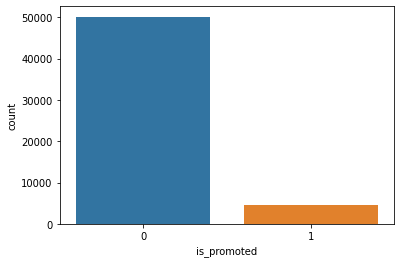

In [ ]:
# Plotting the Target variable

sns.countplot(x="is_promoted",data=df)
plt.show()

In [ ]:
# Checking the value counts in Target Variable

df.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [ ]:
# Shape of the dataset

df.shape

(54808, 13)

In [ ]:
# Dataset Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             52399 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [ ]:
# Identify the Missing Values

df.isna().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [ ]:
# Describe the Numerical data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.0,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.0,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.0,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.0,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.0,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.0,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.0,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Describe the Categorical data

df.describe(include='O').T

,count,unique,top,freq
department,54808,9,Sales & Marketing,16840
region,54808,34,region_2,12343
education,52399,3,Bachelor's,36669
gender,54808,2,m,38496
recruitment_channel,54808,3,other,30446


In [8]:
# Finding columns with numerical data

numericalColumns = df.select_dtypes(include=np.number).columns
numericalColumns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [9]:
# Finding columns with objective data

objectColumns = df.select_dtypes(include=object).columns
objectColumns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

In [10]:
# Finding discrete columns and continuous columns from numerical columns

discreteCols=[]
continuousCols=[]

for column in numericalColumns:
    if df[column].nunique()<=20:
        discreteCols.append(column)
    else:
        continuousCols.append(column)


In [10]:
discreteCols

['no_of_trainings',
 'previous_year_rating',
 'KPIs_met >80%',
 'awards_won?',
 'is_promoted']

In [11]:
continuousCols

['age', 'length_of_service', 'avg_training_score']

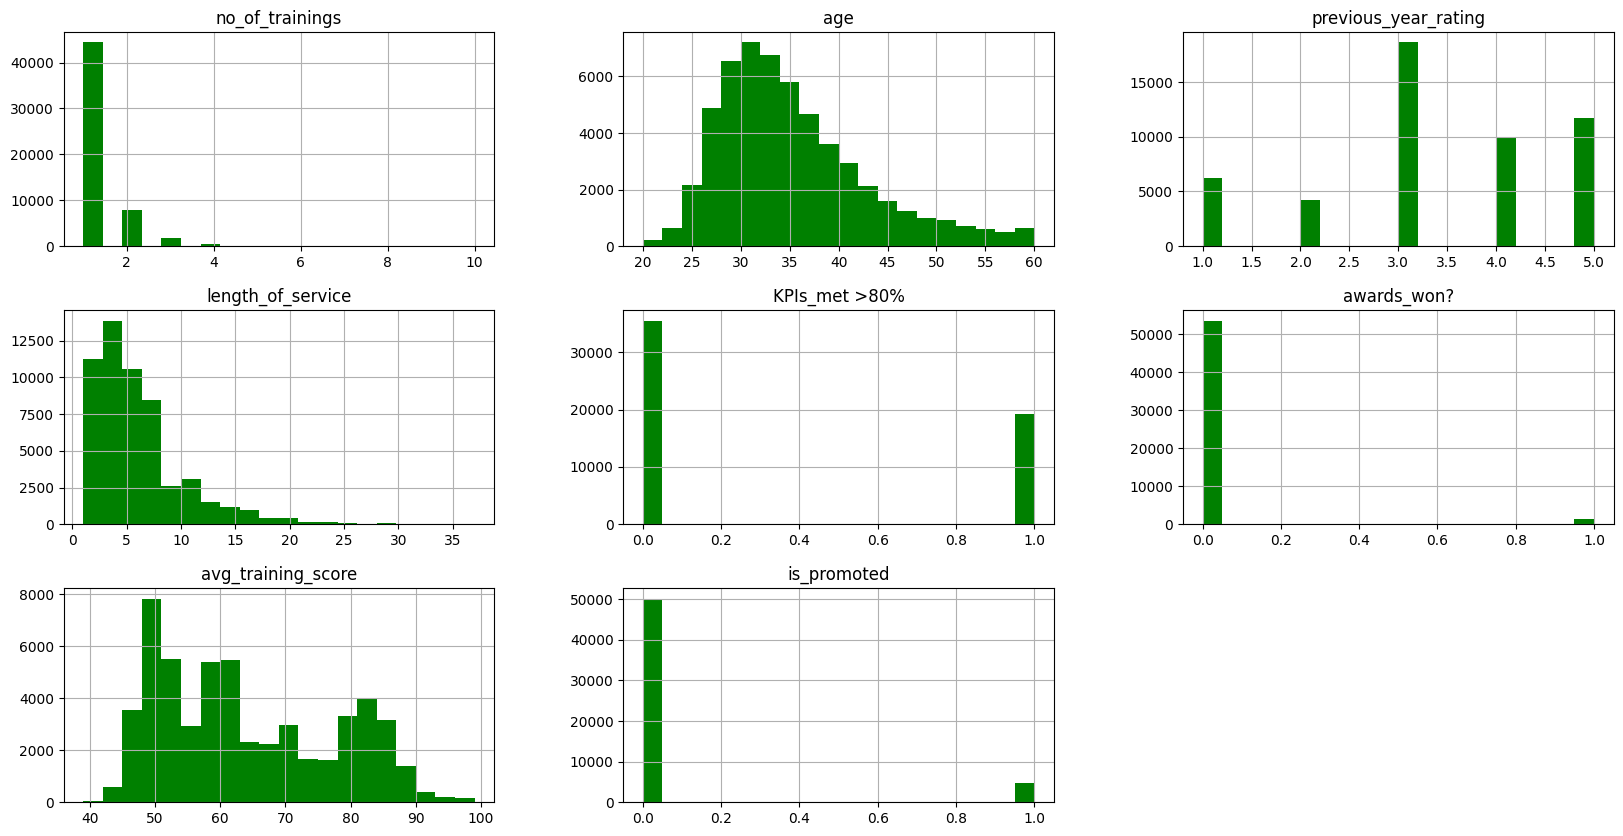

In [ ]:
#Data distribution

df.hist(bins = 20, figsize = (20,10), color = 'g')
plt.show()

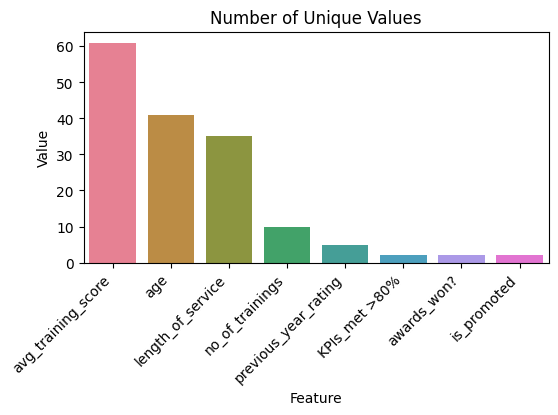

In [ ]:
#Number of Unique Values

unique_values= df.select_dtypes(include='number').nunique()
unique_values = unique_values.reset_index()
unique_values.columns = ["Feature", "Value"]

unique_values = unique_values.sort_values(by="Value", ascending=False)

plt.figure(figsize=(6, 3))
sns.barplot(x="Feature", y="Value", data=unique_values, palette='husl')
plt.title("Number of Unique Values")
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

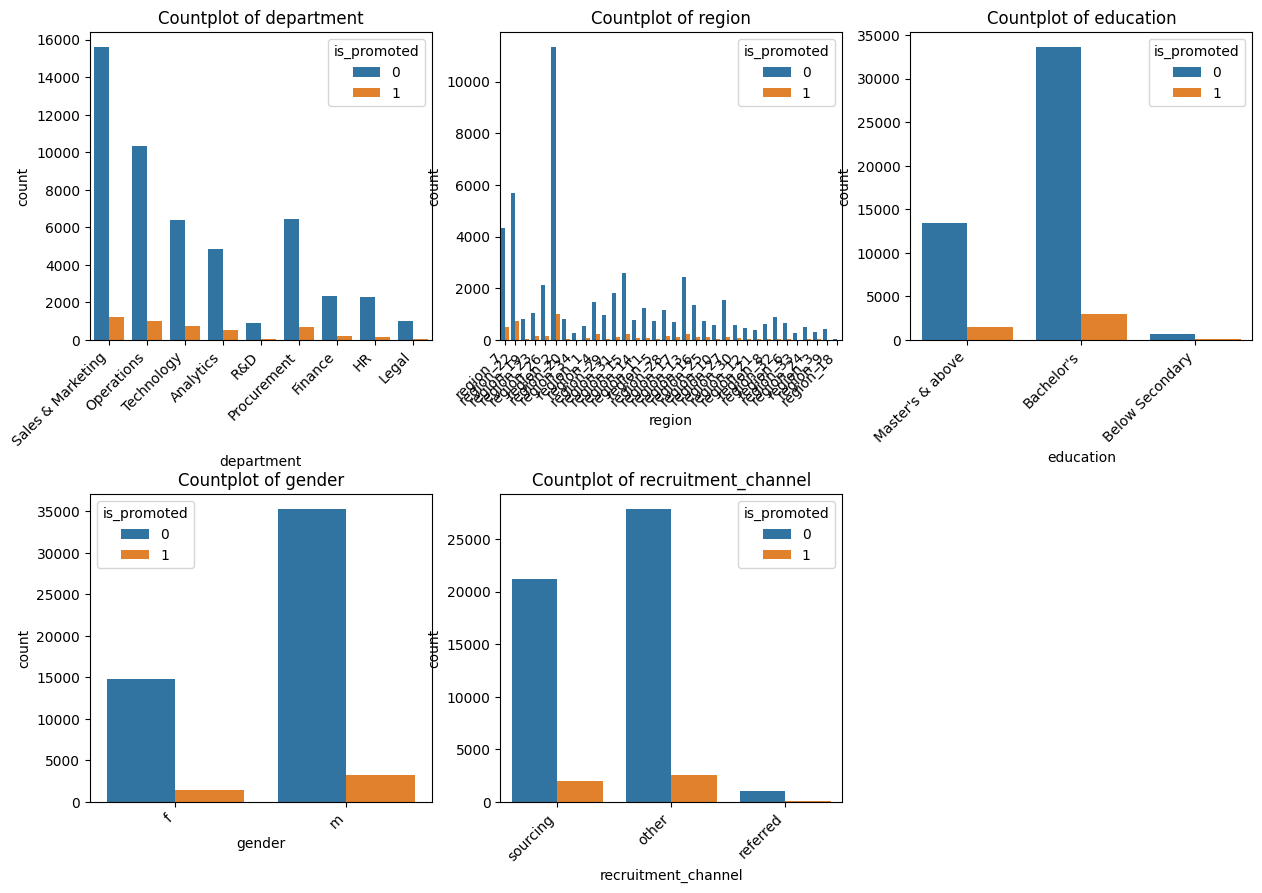

In [11]:
# Categorical data count with hue as Target variable

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

for col, ax in zip(objectColumns, axes.flatten()):
    sns.countplot(x=col, hue='is_promoted', data=df, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.set_title(f'Countplot of {col}')

for i in range(len(objectColumns), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.show()

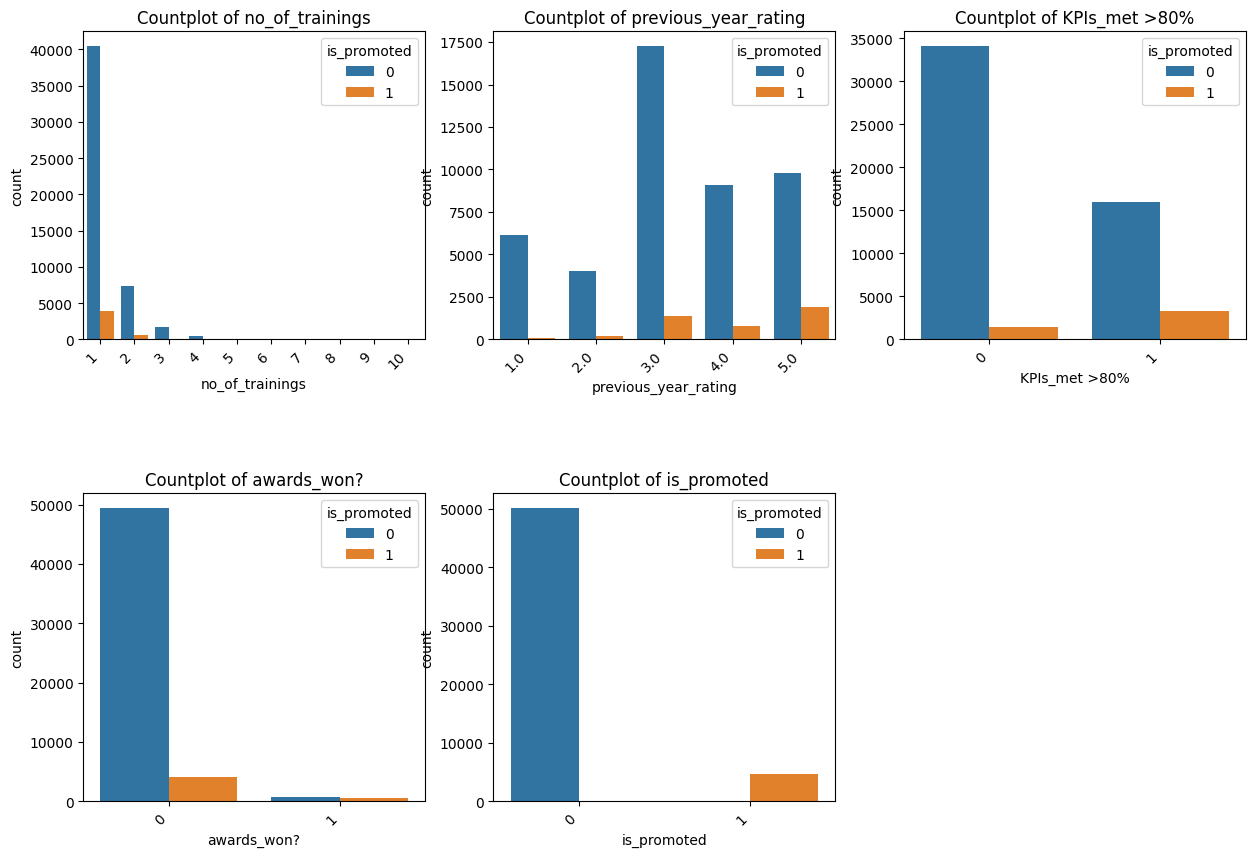

In [12]:
# Numerical data (Discrete data) count with hue as Target variable

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

for col, ax in zip(discreteCols, axes.flatten()):
    sns.countplot(x=col, hue='is_promoted', data=df, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.set_title(f'Countplot of {col}')

for i in range(len(objectColumns), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.show()

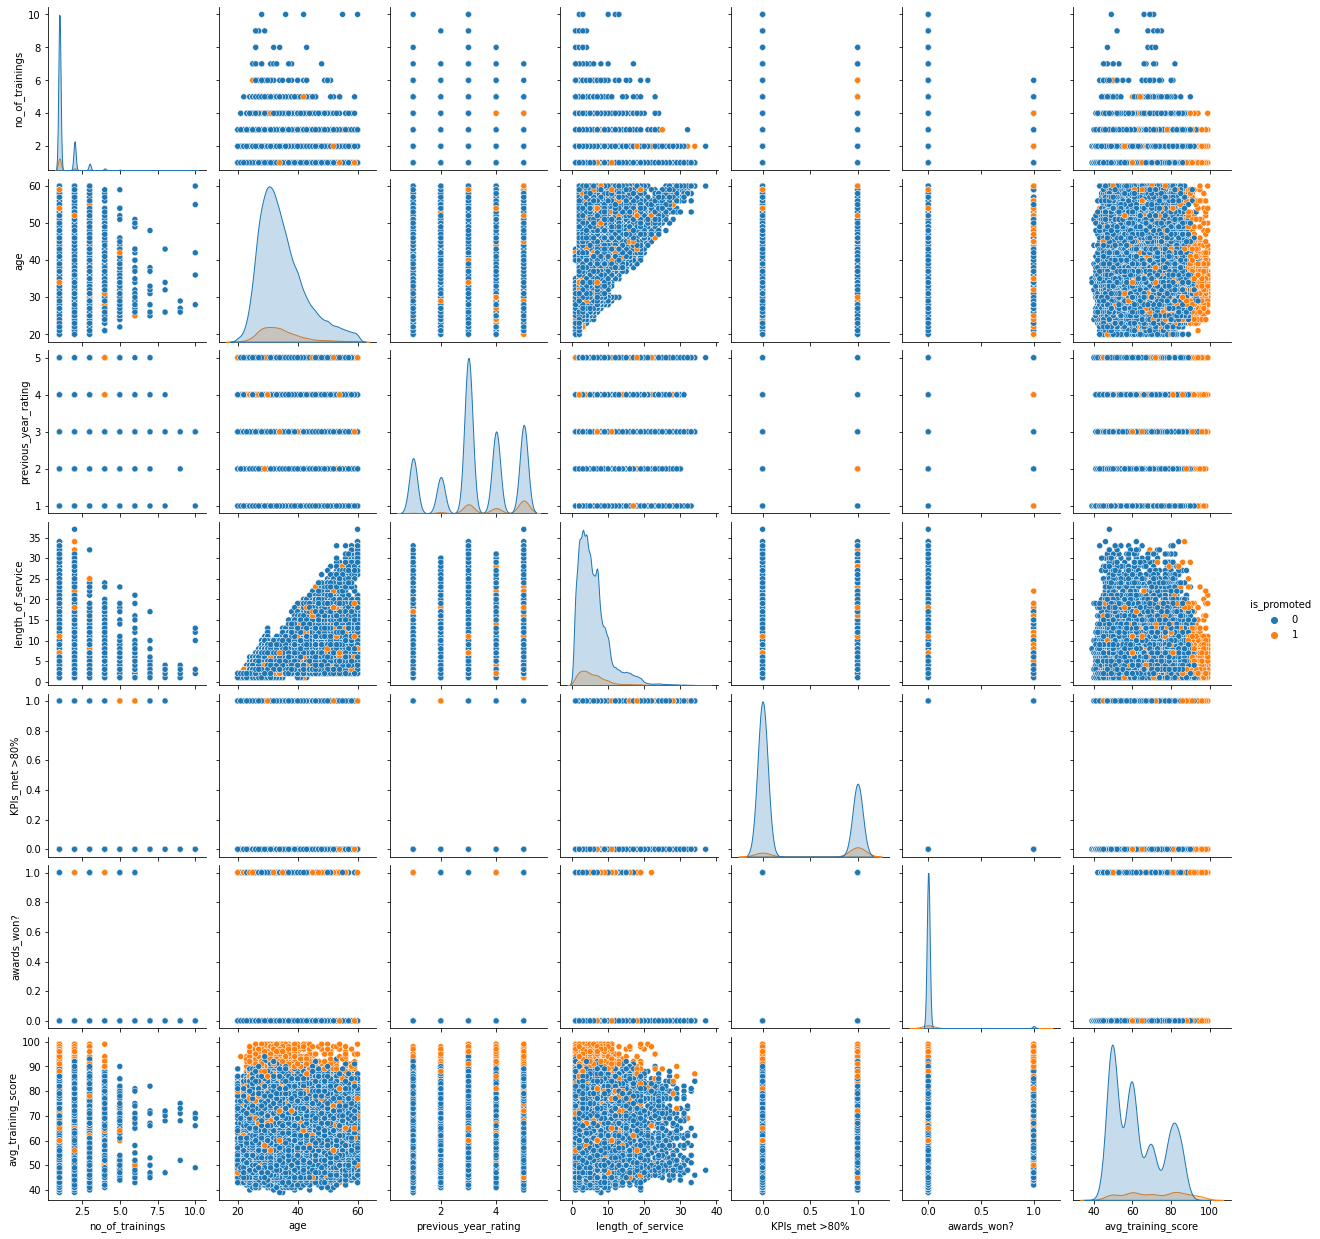

In [ ]:
# Pairplot using sns

sns.pairplot(df,hue='is_promoted')

In [12]:
# Checking for duplicate values

df[df.duplicated()].count()

department              118
region                  118
education               107
gender                  118
recruitment_channel     118
no_of_trainings         118
age                     118
previous_year_rating     56
length_of_service       118
KPIs_met >80%           118
awards_won?             118
avg_training_score      118
is_promoted             118
dtype: int64

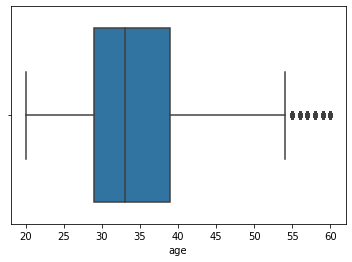

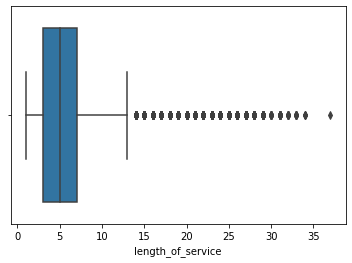

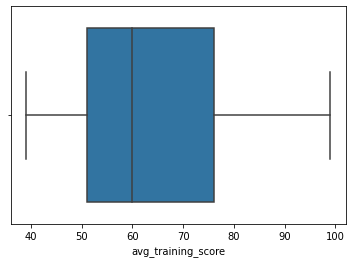

In [ ]:
# Checking for Outlier values by plotting

for column in continuousCols:
    sns.boxplot(column,data=df)
    plt.show()

## Dropping Duplicate Rows

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
# Resetting index after deleting rows
df.reset_index(inplace=True,drop=True)

## Missing Value Treatment

In [18]:
#check the rows with null values to discover if the missing values have any pattern
df[df['previous_year_rating'].isnull()].head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0
23,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,0,70,0
29,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,0,44,0
56,Sales & Marketing,region_31,Bachelor's,f,other,1,29,NaN,1,0,0,49,0
58,Sales & Marketing,region_16,Bachelor's,m,other,2,27,NaN,1,1,0,47,0


In [41]:
# From the output above, one can see that almost all the rows with missing values for previous_year_rating have a length of service=1.

df[df['previous_year_rating'].isnull()]['length_of_service'].unique()

array([1])

In [ ]:
# Since the above output is 1, it is confirmed that all the rows with missing values for previous_year_rating have a length of service=1

#This can be interpreted to mean that workers with only 1 year of service to the firm have misssing values for previous_year_rating,
#because they were not part of the firm in the previous year.

In [13]:
# Since, the reason for missing value in previous_year_rating is the above mentioned, we are imputing the missing value with 0

df['previous_year_rating'].fillna(0,inplace=True)

In [20]:
#check the rows with null values to discover if the missing values have any pattern
df[df['education'].isnull()].head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,Technology,region_23,NaN,m,sourcing,1,30,0.0,1,0,0,77,0
21,Operations,region_15,NaN,m,sourcing,1,41,4.0,11,0,0,57,0
32,Sales & Marketing,region_7,NaN,f,sourcing,1,24,1.0,2,0,0,48,0
43,Sales & Marketing,region_2,NaN,m,other,3,24,2.0,2,0,0,48,0
82,Sales & Marketing,region_2,NaN,m,sourcing,2,25,3.0,2,0,0,53,0


In [14]:
# No pattern were found for the missing value in the education column

# So, Mode values are imputed in missing education values because this is an ordinal variable.

df['education'].fillna(df['education'].mode()[0],inplace=True)

In [46]:
#check if the null values are still present
print('Number of missing values in the training dataset', df.isnull().sum().sum())

Number of missing values in the training dataset 0


## Outlier Treatment

In [15]:
for column in continuousCols:
    upper_lim=df[column].mean() + df[column].std() *3
    lower_lim=df[column].mean() - df[column].std() *3

    df.loc[(df[column] > upper_lim),column] = upper_lim
    df.loc[(df[column] < lower_lim),column] = lower_lim


## Feature Engineering

In [ ]:
# Feature engineering involves the creation of new columns from raw data.The awards_won? and previous_year_rating columns are both,
# performance/productivity metrics. Therefore, we create a new sum_metric columnby summing the two columns.

# We also create a total score column which is the product of the avg_training_score and the no_of_trainings column.

In [16]:
#Creating a sum metric column
df['sum_metric'] = df['awards_won?']+ df['previous_year_rating']

# creating a total score column
df['total_score'] = df['avg_training_score'] * df['no_of_trainings']

## Categorical Encoding

In [17]:
# Using Label Encoding

label_Department = LabelEncoder()
label_Region = LabelEncoder()

df["department"]=label_Department.fit_transform(df["department"])
df["region"]=label_Region.fit_transform(df["region"])

In [26]:
import joblib
joblib.dump(label_Department,'/content/drive/MyDrive/Luminar_Projects/HR_Analytics/label_Department.pkl')
joblib.dump(label_Region,'/content/drive/MyDrive/Luminar_Projects/HR_Analytics/label_Region.pkl')

['/content/drive/MyDrive/Luminar_Projects/HR_Analytics/label_Region.pkl']

In [18]:
# Using Mapping Technique

Education = {"Master's & above":1,"Bachelor's":2,"Below Secondary":3}
Recruitment = {"sourcing":1,"referred":2,"other":3}
Gender = {"f":0,"m":1}

df['education']=df['education'].map(Education)
df['recruitment_channel']=df['recruitment_channel'].map(Recruitment)
df['gender']=df['gender'].map(Gender)

## Correlation

In [27]:
# Correlation on Dataset based on Target Variable

df.corr()['is_promoted']

department              0.000227
region                  0.008752
education              -0.027825
gender                 -0.010985
recruitment_channel    -0.002409
no_of_trainings        -0.024978
age                    -0.017557
previous_year_rating    0.125872
length_of_service      -0.009979
KPIs_met >80%           0.221490
awards_won?             0.195882
avg_training_score      0.181012
is_promoted             1.000000
sum_metric              0.144580
total_score             0.046308
Name: is_promoted, dtype: float64

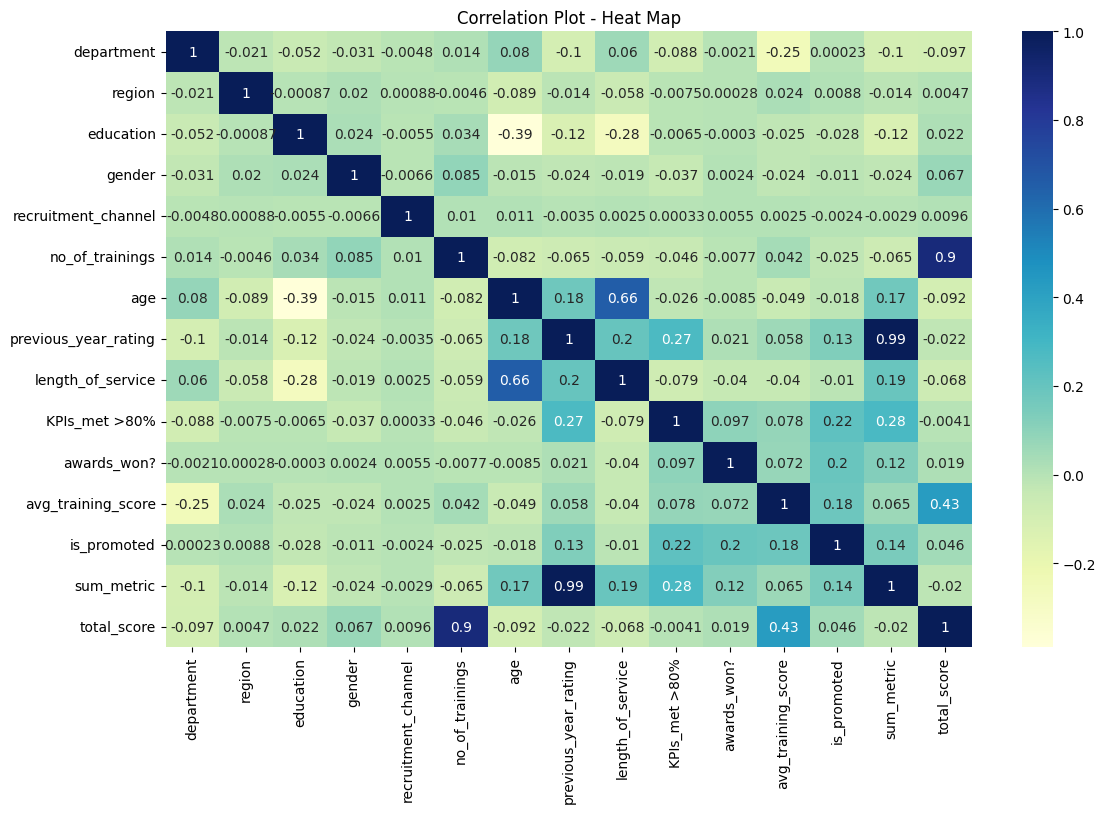

In [22]:
# Correlation Using Heat Map in Input Dataset

plt.figure(figsize=(13,8))
sns.heatmap(df.corr(),annot=True, cmap='YlGnBu')
plt.title('Correlation Plot - Heat Map')
plt.show()

## Normalization & Standardization

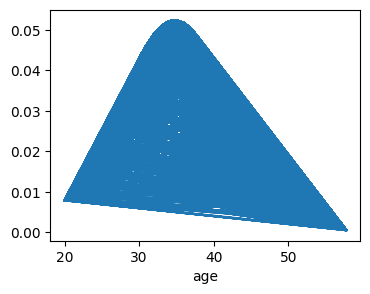

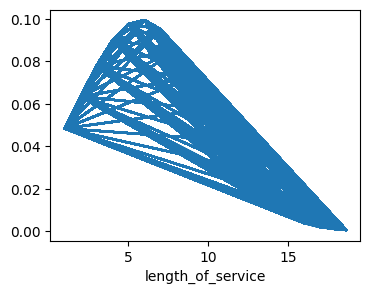

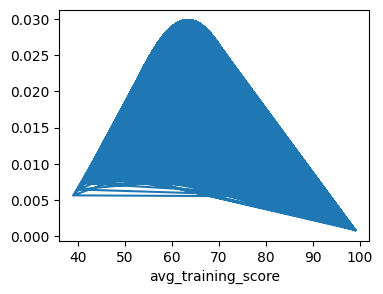

In [24]:
# Plotting th Continous columns in Normal Distribution

for column in continuousCols:
    mean = np.mean(df[column])
    std = np.std(df[column])
    plt.figure(figsize=(4,3))
    plt.plot(df[column], norm.pdf(df[column],mean,std))
    plt.xlabel(column)
    plt.show()

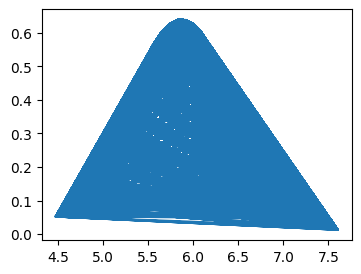

In [28]:
# Making 'age' feature to Noramly Distributed data using Square root Transformtion


df["age"] = df["age"]**(1/2)
mean = np.mean(df["age"])
std = np.std(df["age"])
plt.figure(figsize=(4,3))
plt.plot(df["age"], norm.pdf(df["age"],mean,std))
plt.show()

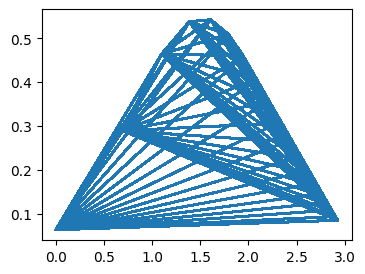

In [29]:
# Making 'length_of_service' feature to Noramly Distributed data using Logarithamic Transformtion

df["length_of_service"]=np.log(df["length_of_service"])
mean = np.mean(df["length_of_service"])
std = np.std(df["length_of_service"])
plt.figure(figsize=(4,3))
plt.plot(df["length_of_service"], norm.pdf(df["length_of_service"],mean,std))
plt.show()

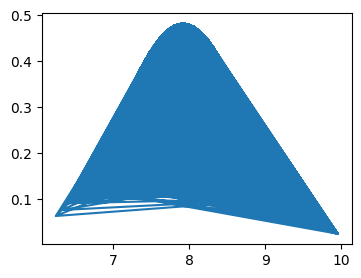

In [30]:
# Making 'avg_training_score' feature to Noramly Distributed data using Square root Transformtion

df["avg_training_score"] = df["avg_training_score"]**(1/2)
mean = np.mean(df["avg_training_score"])
std = np.std(df["avg_training_score"])
plt.figure(figsize=(4,3))
plt.plot(df["avg_training_score"], norm.pdf(df["avg_training_score"],mean,std))
plt.show()

## Train Test Split

In [31]:
X = df.drop('is_promoted',axis=1)
y = df['is_promoted']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## SMOTE

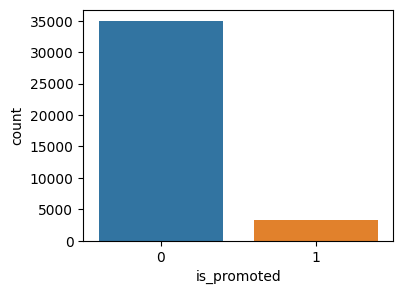

In [32]:
# Plotting the Target variable in training dataset

plt.figure(figsize=(4,3))
sns.countplot(x=y_train)
plt.show()

In [ ]:
# As we can see, the target column is imbalaced, it can lead to bias in the model.
# To correct this, we use SMOTE which has the advantage of increasing the amount of samples trained by the model.

In [33]:
sm = SMOTE(random_state=42)

In [34]:
X_res,y_res = sm.fit_resample(X_train,y_train)

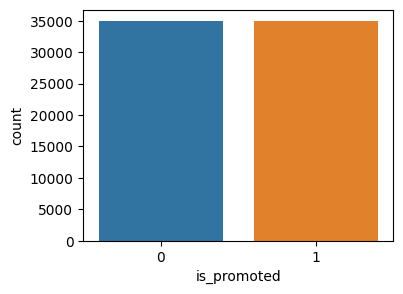

In [35]:
#Check if the data is balanced

plt.figure(figsize=(4,3))
sns.countplot(x=y_res)
plt.show()

## Scale Down

In [36]:
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_res)
X_test_scaled = scale.transform(X_test)

In [37]:
import joblib
joblib.dump(scale,'/content/drive/MyDrive/Luminar_Projects/HR_Analytics/scale.pkl')

['/content/drive/MyDrive/Luminar_Projects/HR_Analytics/scale.pkl']

## Apply All Classification Algorithms

In [35]:
# Voting Classifier

lr_clf = LogisticRegression()
df_clf= DecisionTreeClassifier()
rf_clf= RandomForestClassifier()
adboost_clf= AdaBoostClassifier()
grad_clf=GradientBoostingClassifier()
svc_clf=SVC()
xgb_clf = XGBClassifier()

voting = VotingClassifier( estimators=[('Logistic_Regression',lr_clf),('Decision_Tree_Classifier',df_clf),('Random_Forest_Classifier',rf_clf),
                            ('AdaBoost_Classifier',adboost_clf),('Gradient_Boosting_Classifier',grad_clf),('SVC',svc_clf),('XGB_Classifier',xgb_clf)], voting= 'hard')

voting.fit(X_train_scaled,y_res)

VotingClassifier(estimators=[('Logistic_Regression', LogisticRegression()),
                             ('Decision_Tree_Classifier',
                              DecisionTreeClassifier()),
                             ('Random_Forest_Classifier',
                              RandomForestClassifier()),
                             ('AdaBoost_Classifier', AdaBoostClassifier()),
                             ('Gradient_Boosting_Classifier',
                              GradientBoostingClassifier()),
                             ('SVC', SVC()),
                             ('XGB_Classifier',
                              XGBClassifier(base_score=None...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))])

In [36]:
voting_pred = voting.predict(X_test_scaled)

In [37]:
print(voting.score(X_train_scaled,y_res))
print(accuracy_score(y_test,voting_pred))

0.9561103023036739
0.8893764856463705


In [38]:
# Applying all Classification Algorithms to find the best model

for clf in (lr_clf,df_clf,rf_clf,adboost_clf,grad_clf,svc_clf,xgb_clf):
  clf.fit(X_train_scaled,y_res)
  y_pred = clf.predict(X_test_scaled)
  print(clf.__class__.__name__,clf.score(X_train_scaled,y_res))
  print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

  print("============================================")

LogisticRegression 0.727455682110131
LogisticRegression 0.732614128116048
DecisionTreeClassifier 0.9999143615654705
DecisionTreeClassifier 0.8803559456329615
RandomForestClassifier 0.9999143615654705
RandomForestClassifier 0.9133906259523374
AdaBoostClassifier 0.8295795152864606
AdaBoostClassifier 0.8230633266288779
GradientBoostingClassifier 0.9122206046073478
GradientBoostingClassifier 0.8871213506430182
SVC 0.8206873911678227
SVC 0.7515085024684586
XGBClassifier 0.9678570409066256
XGBClassifier 0.9367343207167672


## Hyperparameter Tuning

In [42]:
lr_clf = LogisticRegression()
df_clf= DecisionTreeClassifier()
rf_clf= RandomForestClassifier()
adboost_clf= AdaBoostClassifier()
grad_clf=GradientBoostingClassifier()
svc_clf=SVC()
xgb_clf = XGBClassifier()

clf_list=[lr_clf,df_clf,rf_clf,adboost_clf,grad_clf,svc_clf]

grid_params_lr= [{'penalty':['l1','l2'],'solver':['saga']}]

grid_params_df =[{'criterion':["gini","entropy"], 'splitter':['best','random'],'max_depth':[3,4,5],'min_samples_split':[2,3,4],'max_features':["auto","sqrt","log2"]}]

grid_params_rf=[{'n_estimators': [4, 6, 9], 'max_features': ['log2', 'sqrt','auto'], 'criterion': ['entropy', 'gini'],'max_depth': [2, 3, 5, 10]}]

grid_params_adboost=[{'n_estimators':[10,50,250,1000],'learning_rate':[0.01,0.1],}]

grid_params_grad=[{'loss':['deviance', 'exponential'],'learning_rate':[1,7,9],'criterion':['friedman_mse','squared_error']}]

grid_params_svc=[{'kernel':['linear','poly','rbf'],'degree':[3,4,5]}]





clf_params=[grid_params_lr,grid_params_df,grid_params_rf,grid_params_adboost,grid_params_grad,grid_params_svc]

In [ ]:
for clf,clf_param in zip(clf_list,clf_params):
  print(f"The Classifier is {clf} and its hyper params are {clf_param}")

  grid_clf = GridSearchCV(estimator=clf,param_grid=clf_param,scoring="accuracy",cv=10)
  grid_clf.fit(X_train_scaled,y_res)

  print(f"The Train accuracy for the {clf} is {grid_clf.score(X_train_scaled,y_res)}")

  print(f"The Test accuracy for the {clf} is {grid_clf.score(X_test_scaled,y_test)}")

  print(f"The Best param for the {clf} is {grid_clf.best_params_}")
  print("====================\n")

The Classifier is LogisticRegression() and its hyper params are [{'penalty': ['l1', 'l2'], 'solver': ['saga']}]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

The Train accuracy for the LogisticRegression() is 0.7275413205446605
The Test accuracy for the LogisticRegression() is 0.7328579264947888
The Best param for the LogisticRegression() is {'penalty': 'l1', 'solver': 'saga'}

The Classifier is DecisionTreeClassifier() and its hyper params are [{'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [3, 4, 5], 'min_samples_split': [2, 3, 4], 'max_features': ['auto', 'sqrt', 'log2']}]
The Train accuracy for the DecisionTreeClassifier() is 0.6961976535068939
The Test accuracy for the DecisionTreeClassifier() is 0.6993965990126165
The Best param for the DecisionTreeClassifier() is {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_split': 2, 'splitter': 'best'}

The Classifier is RandomForestClassifier() and its hyper params are [{'n_estimators': [4, 6, 9], 'max_features': ['log2', 'sqrt', 'auto'], 'criterion': ['entropy', 'gini'], 'max_depth': [2, 3, 5, 10]}]
The Train accuracy for the RandomFo

In [52]:
# Making the best model - Gradient Boost

gradient_clf= GradientBoostingClassifier(criterion='squared_error', learning_rate=1, loss= 'deviance')
gradient_clf.fit(X_train_scaled,y_res)

GradientBoostingClassifier(criterion='squared_error', learning_rate=1,
                           loss='deviance')

Training Accuracy : 0.9662441837229883
Testing Accuracy: 0.9363076735539708
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     14994
           1       0.79      0.35      0.49      1413

    accuracy                           0.94     16407
   macro avg       0.87      0.67      0.73     16407
weighted avg       0.93      0.94      0.92     16407



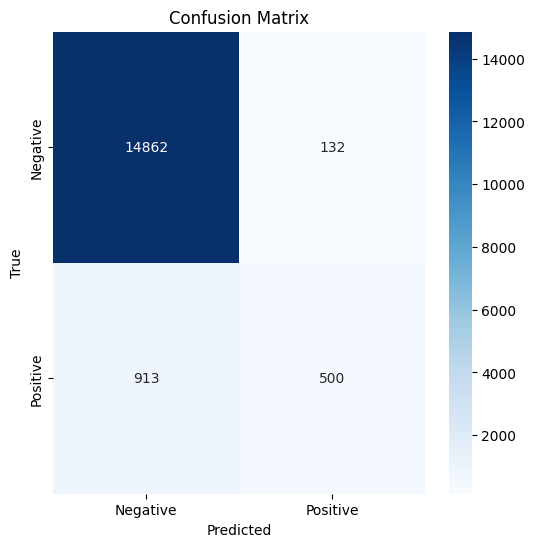

In [54]:
# Model Evaluation

print("Training Accuracy :", gradient_clf.score(X_train_scaled,y_res))
print("Testing Accuracy:", gradient_clf.score(X_test_scaled,y_test))


y_pred = gradient_clf.predict(X_test_scaled)
print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [55]:
# Pickle File

import joblib
joblib.dump(gradient_clf,'/content/drive/MyDrive/Luminar_Projects/HR_Analytics/model.pkl')

['/content/drive/MyDrive/Luminar_Projects/HR_Analytics/model.pkl']